<a href="https://colab.research.google.com/github/hafizsam/KPTPACE-DLCV/blob/main/introToOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!git clone https://gitfront.io/r/user-8948418/7v8eAoZ77xBD/KPTPACE-DLCV-Workshop.gitfront.git

In [ ]:
path = "/content/KPTPACE-DLCV-Workshop.gitfront/220715_day3/04_Image_Enhancement/"

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

In [ ]:
# Read image as gray scale.
cb_img = cv2.imread(path+"checkerboard_18x18.png",0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')
print(cb_img)

In [ ]:
cb_img_copy = cb_img.copy()
cb_img_copy[2,2] = 200
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 200
cb_img_copy[3,3] = 200
print(cb_img_copy)
plt.imshow(cb_img_copy,cmap="gray")

In [ ]:
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

img_NZ_bgr = cv2.imread(path+"New_Zealand_Boat.jpg",cv2.IMREAD_COLOR)
cropped_region_rgb = img_NZ_bgr[200:400, 300:600,::-1]
resized_cropped_region_2x = cv2.resize(cropped_region_rgb,dsize=dim,fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

resized_cropped_region_2x = resized_cropped_region_2x[:,:,::-1]
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)
Image(filename=path+'resized_cropped_region_2x.png')


In [ ]:
image = cv2.imread(path+"Apollo_11_Launch.jpg", cv2.IMREAD_COLOR)
imageTest = image.copy()

#Draw Circle
cv2.circle(imageTest, (400,630), 30, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);

#Draw Rectangle
cv2.rectangle(imageTest, (500, 600), (700, 100), (255, 0, 0), thickness=3, lineType=cv2.LINE_AA);

#Add Text
text = "Apollo 11 Saturn V Launch, July 16, 1969"
fontScale = 1.9
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2

cv2.putText(imageTest, text, (600, 700), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_8);

# Display the image
plt.imshow(imageTest[:,:,::-1])

In [ ]:
img_bgr = cv2.imread(path + "New_Zealand_Coast.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Brightness(addition)
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50
img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)

# Contrast(multiplication)
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2
img_rgb_lower  = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,255)) #Using np.clip to handle overflow

# Show the images

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");
plt.subplot(231); plt.imshow(img_rgb_lower);  plt.title("Lower Contrast");
plt.subplot(232); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(233); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");


In [ ]:
img_read = cv2.imread(path+"building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(img_read, cmap="gray");         plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh, cmap="gray");       plt.title("Thresholded");

print(img_thresh.shape)

In [ ]:
# Read the original image
img_read = cv2.imread(path+"Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read,50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read,130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[6,5])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

(200, 499)


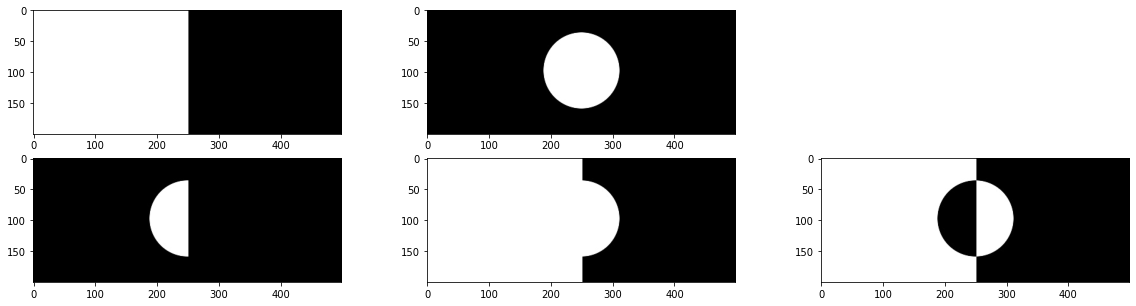

In [ ]:
# Bitwise Operation

img_rec = cv2.imread(path+"rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread(path+"circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(231);plt.imshow(img_rec,cmap='gray')
plt.subplot(232);plt.imshow(img_cir,cmap='gray')
print(img_rec.shape)

# AND Operator

andResult = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.subplot(234);plt.imshow(andResult,cmap='gray')

# OR Operator
orResult = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.subplot(235);plt.imshow(orResult,cmap='gray')

# XOR Operator
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.subplot(236);plt.imshow(result,cmap='gray')